In [3]:
if (!require("viridis")) {
  install.packages("viridis", repos="http://cran.rstudio.com/") 
  library("viridis")
}

if (!require("ggthemes")) {
  install.packages("ggthemes", repos="http://cran.rstudio.com/") 
  library("ggthemes")
}

if (!require("cluster")) {
  install.packages("cluster", repos="http://cran.rstudio.com/") 
  library("cluster")
}
if (!require("ggmap")) {
  install.packages("ggmap", repos="http://cran.rstudio.com/") 
  library("ggmap")
}

if (!require("maps")) {
  install.packages("maps", repos="http://cran.rstudio.com/") 
  library("maps")
}
if (!require("ggplot2")) {
  install.packages("ggplot2", repos="http://cran.rstudio.com/") 
  library("ggplot2")
}

if (!require("dplyr")) {
  install.packages("dplyr", repos="http://cran.rstudio.com/") 
  library("dplyr")
}

if (!require("tidyr")) {
  install.packages("tidyr", repos="http://cran.rstudio.com/") 
  library("tidyr")
}


Loading required package: viridis
Warning message:
"package 'viridis' was built under R version 3.4.3"Loading required package: viridisLite
Warning message:
"package 'viridisLite' was built under R version 3.4.3"Loading required package: ggthemes
Warning message:
"package 'ggthemes' was built under R version 3.4.3"Loading required package: cluster
Loading required package: ggmap
Warning message:
"package 'ggmap' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Loading required package: maps
Warning message:
"package 'maps' was built under R version 3.4.3"
Attaching package: 'maps'

The following object is masked from 'package:cluster':

    votes.repub

Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

In [4]:
tor <- read.csv('C://Users//Amara//Desktop//Canada Dataset//project_data//MCI_2014_to_2017.csv')
dim(tor)

[1] 131073     29

In [5]:
nrow(tor)
tor <- subset(tor, !duplicated(tor$event_unique_id)) # Remove duplicate data with same event ID.
nrow(tor)

[1] 131073

[1] 113908

In [6]:
drop <- c("X", "Y", "Index_", "ucr_code", "ucr_ext", "reporteddate", "reportedmonth", "reportedday", "reporteddayofyear", "reporteddayofweek", "reportedhour", "occurrencedayofyear", "Division", "Hood_ID", "FID")

In [7]:
tor <- tor[, !(names(tor) %in% drop)] # I have created drop list in last line, now the df modified without col names in drops

In [8]:
head(tor)
unique(tor$occurrenceyear)
unique(tor$reportedyear)

ï..X,event_unique_id,occurrencedate,premisetype,offence,reportedyear,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long
-79.52040,GO-20142775022,2014-08-25T04:00:00.000Z,Outside,Assault,2014,2014,August,25,Monday,18,Assault,Black Creek (24),43.76883,-79.52040
-79.58086,GO-20142870874,2014-08-25T04:00:00.000Z,House,B&E W'Intent,2014,2014,August,25,Monday,9,Break and Enter,Eringate-Centennial-West Deane (11),43.64257,-79.58086
-79.26044,GO-20142802386,2014-08-25T04:00:00.000Z,House,Assault,2014,2014,August,25,Monday,11,Assault,Bendale (127),43.76291,-79.26044
-79.36755,GO-20142777955,2014-08-25T04:00:00.000Z,Commercial,B&E,2014,2014,August,25,Monday,17,Break and Enter,Cabbagetown-South St.James Town (71),43.66321,-79.36755
-79.23176,GO-20142778699,2014-08-25T04:00:00.000Z,Other,B&E,2014,2014,August,25,Monday,16,Break and Enter,Woburn (137),43.77644,-79.23176
-79.23176,GO-20142779394,2014-08-25T04:00:00.000Z,Commercial,B&E,2014,2014,August,25,Monday,16,Break and Enter,Woburn (137),43.77644,-79.23176


[1] 2014 2005 2013 2011   NA 2012 2009 2001 2000 2002 2003 2004 2006 2007 2008
[16] 2010 2015 2016 2017

[1] 2014 2016 2015 2017

In [9]:
#Interesting finding is, many occurances in past have been reported during 2014 to 2017

summary(tor)

      ï..X              event_unique_id                    occurrencedate  
 Min.   :-79.64   GO-20141035797:     1   2014-01-01T05:00:00.000Z:   160  
 1st Qu.:-79.47   GO-20141056448:     1   2015-01-01T05:00:00.000Z:   151  
 Median :-79.39   GO-20141086943:     1   2015-11-01T04:00:00.000Z:   136  
 Mean   :-79.40   GO-20141150249:     1   2016-01-01T05:00:00.000Z:   123  
 3rd Qu.:-79.32   GO-20141217261:     1   2017-01-01T05:00:00.000Z:   122  
 Max.   :-79.12   GO-20141252092:     1   2014-11-01T04:00:00.000Z:   117  
                  (Other)       :113902   (Other)                 :113099  
     premisetype                      offence       reportedyear 
 Apartment :27621   Assault               :43667   Min.   :2014  
 Commercial:21775   B&E                   :22688   1st Qu.:2015  
 House     :22528   Theft Of Motor Vehicle:12388   Median :2016  
 Other     :12396   Assault With Weapon   : 8242   Mean   :2016  
 Outside   :29588   Robbery - Mugging     : 3917   3rd Qu.:201

In [ ]:
#Interesting finding is, many occurrences were reported in later date. 

In [10]:
year_grp <- group_by(tor, occurrenceyear)
crime_by_year <- summarise(year_grp,
                          n = n())
crime_by_year

occurrenceyear,n
2000,12
2001,5
2002,7
2003,6
2004,8
2005,5
2006,6
2007,12
2008,18
2009,22


In [11]:
#Here i will count only 2016 and 2017 crime reported year. 

In [15]:
tor_2017 <- tor[tor$reportedyear == 2017, ]
tor_2016 <- tor[tor$reportedyear == 2016, ]
tor_2015 <- tor[tor$reportedyear == 2015, ]
tor_2014 <- tor[tor$reportedyear == 2014, ]

In [16]:
head(tor_2017)
nrow(tor_2017)
nrow(tor_2016)
nrow(tor_2015)
nrow(tor_2014)

,ï..X,event_unique_id,occurrencedate,premisetype,offence,reportedyear,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long
524,-79.54957,GO-20173242605,2005-01-01T05:00:00.000Z,Apartment,Pointing A Firearm,2017,2005,January,1,Saturday,12,Assault,Kingsview Village-The Westway (6),43.70329,-79.54957
549,-79.50729,GO-20173084520,2014-07-01T04:00:00.000Z,House,B&E,2017,2014,July,1,Tuesday,0,Break and Enter,Stonegate-Queensway (16),43.64125,-79.50729
1022,-79.39344,GO-201733644,2013-04-01T04:00:00.000Z,Apartment,Theft Over,2017,2013,April,1,Monday,0,Theft Over,Kensington-Chinatown (78),43.65277,-79.39344
1031,-79.36758,GO-20173130210,2013-08-02T04:00:00.000Z,House,Assault,2017,2013,August,2,Friday,16,Assault,Leaside-Bennington (56),43.70740,-79.36758
1108,-79.28144,GO-20171694953,1998-01-01T05:00:00.000Z,Apartment,Assault,2017,NA,,NA,,0,Assault,Dorset Park (126),43.74818,-79.28144
1112,-79.21413,GO-2017183174,2000-01-01T05:00:00.000Z,House,Assault,2017,2000,January,1,Saturday,23,Assault,Malvern (132),43.81636,-79.21413


[1] 29648

[1] 28278

[1] 28095

[1] 27887

In [17]:
#I will work with 2017 data first so lets check the data and exclude all other occurence year except 2017 because of less no of occurance on other years. 
year_grp <- group_by(tor_2017, occurrenceyear)
crime_by_year <- summarise(year_grp,
                          n = n())
crime_by_year

occurrenceyear,n
2000,2
2002,2
2003,1
2004,1
2005,1
2006,2
2007,1
2008,2
2009,2
2010,5


In [21]:
year_grp_16 <- group_by(tor_2016, occurrenceyear)
crime_by_year_16 <- summarise(year_grp_16,
                          n = n())
crime_by_year_16

occurrenceyear,n
2000,2
2001,2
2002,3
2003,2
2005,1
2006,1
2007,5
2008,1
2009,1
2010,9


In [18]:
tor_2017_mod <- tor_2017[complete.cases(tor_2017), ]  #To remove missing values.

In [22]:
tor_2016_mod <- tor_2016[complete.cases(tor_2016), ]  #To remove missing values.

In [19]:
tor_2017_mod$reportedyear <- NULL #remove the report year

In [23]:
tor_2016_mod$reportedyear <- NULL #remove the report year

In [20]:
#Data Exploration

#What is the most prominent major crime indicator in 2017

indic_group_17 <- group_by(tor_2017_mod, MCI)
crime_by_indic_17 <- summarise(indic_group_17, n=n())
crime_by_indic_17 <- crime_by_indic_17[order(crime_by_indic_17$n, decreasing = TRUE),]
crime_by_indic_17

MCI,n
Assault,15560
Break and Enter,6745
Auto Theft,3200
Robbery,3009
Theft Over,1133


In [24]:
#What is the most prominent major crime indicator in 2017

indic_group_16 <- group_by(tor_2016_mod, MCI)
crime_by_indic_16 <- summarise(indic_group_16, n=n())
crime_by_indic_16 <- crime_by_indic_16[order(crime_by_indic_16$n, decreasing = TRUE),]
crime_by_indic_16

MCI,n
Assault,15312
Break and Enter,6269
Auto Theft,2919
Robbery,2790
Theft Over,984


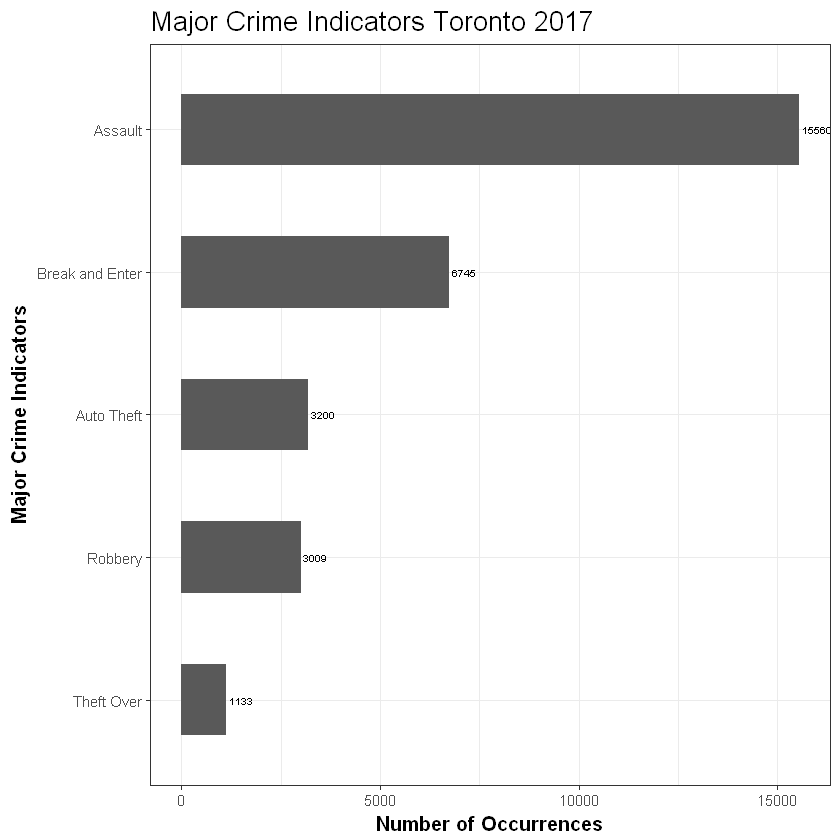

In [31]:
ggplot(aes(x = reorder(MCI, n), y = n), data = crime_by_indic_17) +
  geom_bar(stat = 'identity', width = 0.5) +
  geom_text(aes(label = n), stat = 'identity', data = crime_by_indic_17, hjust = -0.1, size = 2.2) +
  coord_flip() +
  xlab('Major Crime Indicators') +
  ylab('Number of Occurrences') +
  ggtitle('Major Crime Indicators Toronto 2017') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

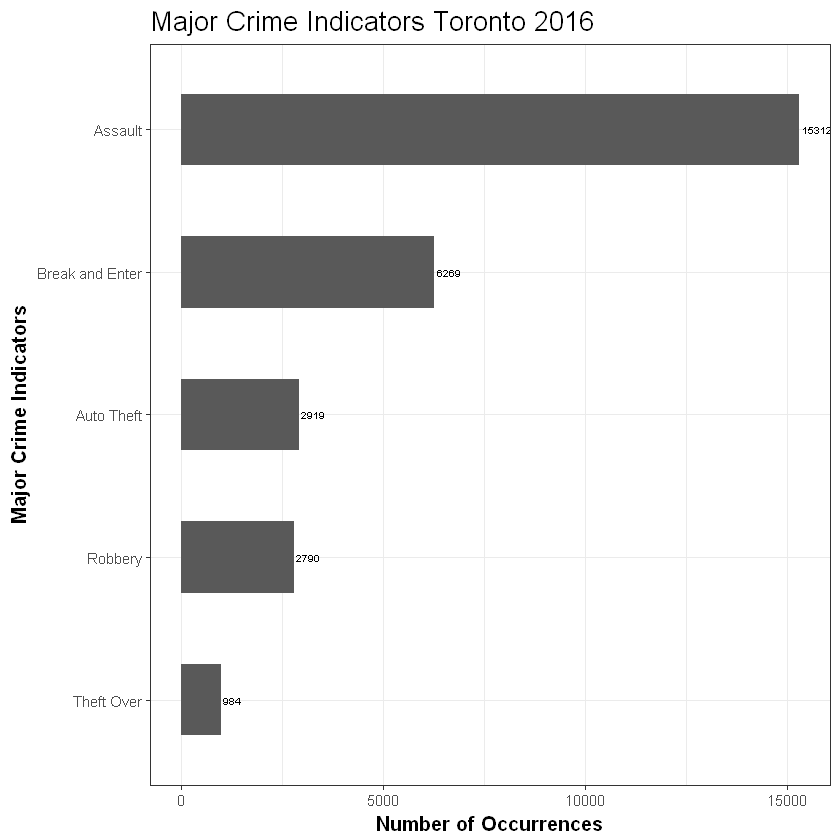

In [30]:
ggplot(aes(x = reorder(MCI, n), y = n), data = crime_by_indic_16) +
  geom_bar(stat = 'identity', width = 0.5) +
  geom_text(aes(label = n), stat = 'identity', data = crime_by_indic_16, hjust = -0.1, size = 2.2) +
  coord_flip() +
  xlab('Major Crime Indicators') +
  ylab('Number of Occurrences') +
  ggtitle('Major Crime Indicators Toronto 2016') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

In [28]:
assault_17 <- tor_2017_mod[tor_2017_mod$MCI == 'Assault', ]
assault_group_17 <- group_by(assault_17, offence)
assault_by_offence_17 <- summarise(assault_group_17, n=n())
assault_by_offence_17 <- assault_by_offence_17[order(assault_by_offence_17$n, decreasing = TRUE), ]
assault_by_offence_17

offence,n
Assault,11193
Assault With Weapon,2467
Assault Bodily Harm,572
Assault Peace Officer,402
Assault - Resist/ Prevent Seiz,270
Discharge Firearm With Intent,170
Aggravated Assault,153
Discharge Firearm - Recklessly,129
Pointing A Firearm,86
Assault Peace Officer Wpn/Cbh,37


In [34]:
assault_16 <- tor_2016_mod[tor_2016_mod$MCI == 'Assault', ]
assault_group_16 <- group_by(assault_16, offence)
assault_by_offence_16 <- summarise(assault_group_16, n=n())
assault_by_offence_16 <- assault_by_offence_16[order(assault_by_offence_16$n, decreasing = TRUE), ]
assault_by_offence_16

offence,n
Assault,11278
Assault With Weapon,2108
Assault Bodily Harm,629
Assault Peace Officer,347
Assault - Resist/ Prevent Seiz,282
Discharge Firearm With Intent,196
Aggravated Assault,174
Discharge Firearm - Recklessly,129
Pointing A Firearm,64
Assault - Force/Thrt/Impede,28


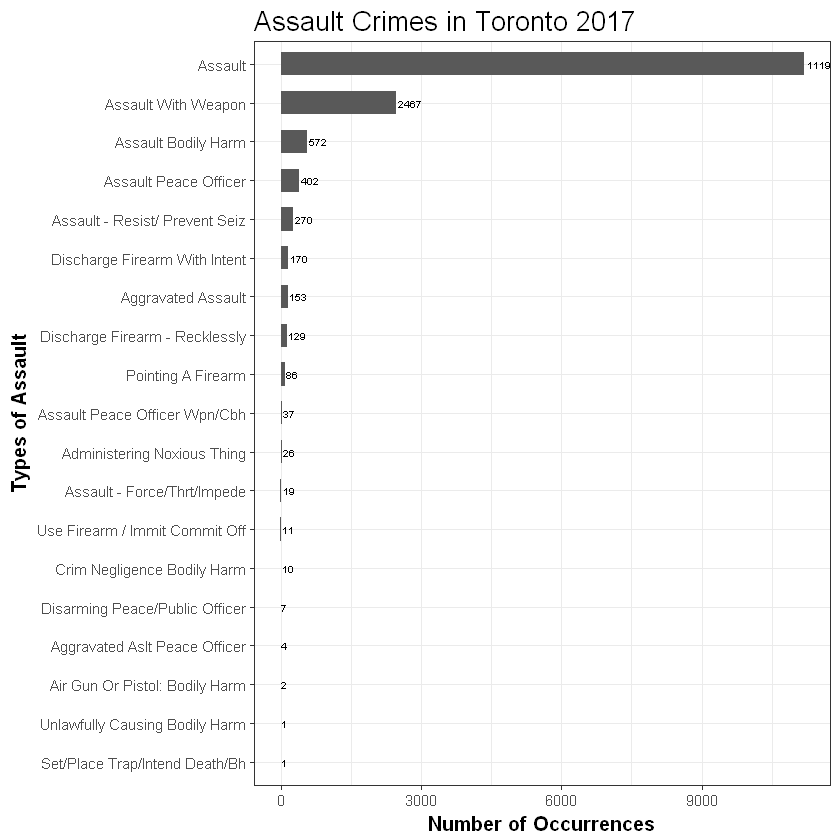

In [36]:
ggplot(aes(x = reorder(offence, n), y = n), data = assault_by_offence_17) +
  geom_bar(stat = 'identity', width = 0.6) +
  geom_text(aes(label = n), stat = 'identity', data = assault_by_offence_17, hjust = -0.1, size = 2.2) +
  coord_flip() +
  xlab('Types of Assault') +
  ylab('Number of Occurrences') +
  ggtitle('Assault Crimes in Toronto 2017') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

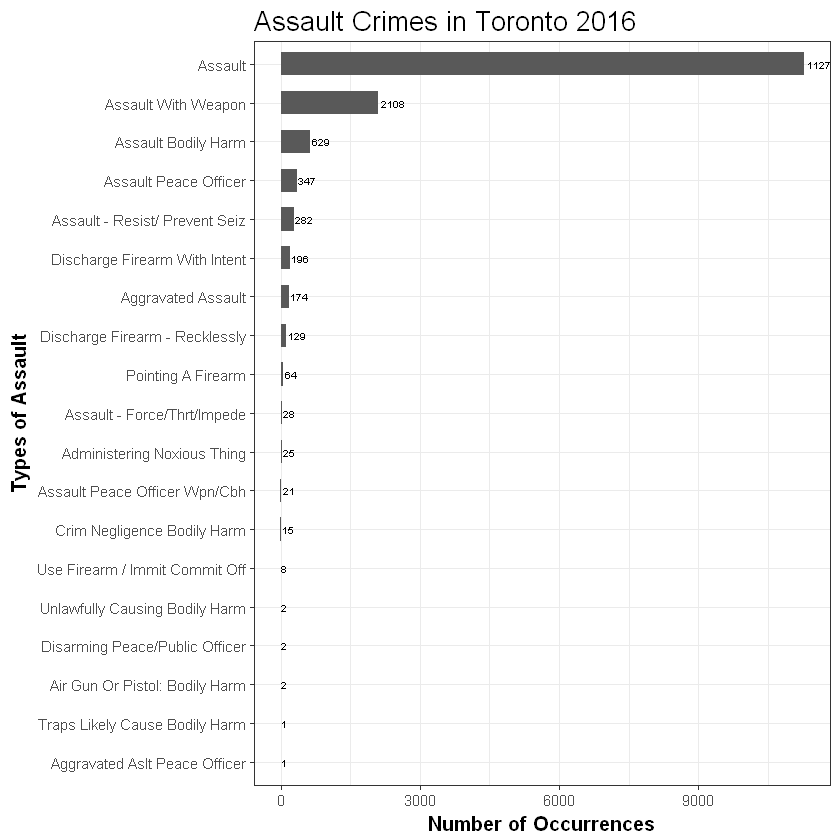

In [37]:
ggplot(aes(x = reorder(offence, n), y = n), data = assault_by_offence_16) +
  geom_bar(stat = 'identity', width = 0.6) +
  geom_text(aes(label = n), stat = 'identity', data = assault_by_offence_16, hjust = -0.1, size = 2.2) +
  coord_flip() +
  xlab('Types of Assault') +
  ylab('Number of Occurrences') +
  ggtitle('Assault Crimes in Toronto 2016') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

In [ ]:
ggplot(aes(x = reorder(offence, n), y = n), data = crime_by_offence_17) +
  geom_bar(stat = 'identity', width = 0.7) +
  geom_text(aes(label = n), stat = 'identity', data = crime_by_offence_17, hjust = -0.1, size = 2) +
  coord_flip() +
  xlab('Types of Offence') +
  ylab('Number of Occurrences') +
  ggtitle('Offence Types in Toronto 2017') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

In [38]:
offence_group_17 <- group_by(tor_2017_mod, offence)
crime_by_offence_17 <- summarise(offence_group_17, n=n())
crime_by_offence_17 <- crime_by_offence_17[order(crime_by_offence_17$n, decreasing = TRUE), ]
crime_by_offence_17

offence,n
Assault,11193
B&E,5791
Theft Of Motor Vehicle,3200
Assault With Weapon,2467
Robbery - Mugging,968
B&E W'Intent,783
Theft Over,667
Assault Bodily Harm,572
Robbery With Weapon,475
Robbery - Other,465


In [39]:
offence_group_16 <- group_by(tor_2016_mod, offence)
crime_by_offence_16 <- summarise(offence_group_16, n=n())
crime_by_offence_16 <- crime_by_offence_16[order(crime_by_offence_16$n, decreasing = TRUE), ]
crime_by_offence_16

offence,n
Assault,11278
B&E,5325
Theft Of Motor Vehicle,2919
Assault With Weapon,2108
Robbery - Mugging,921
B&E W'Intent,767
Assault Bodily Harm,629
Theft Over,532
Robbery With Weapon,458
Robbery - Other,422


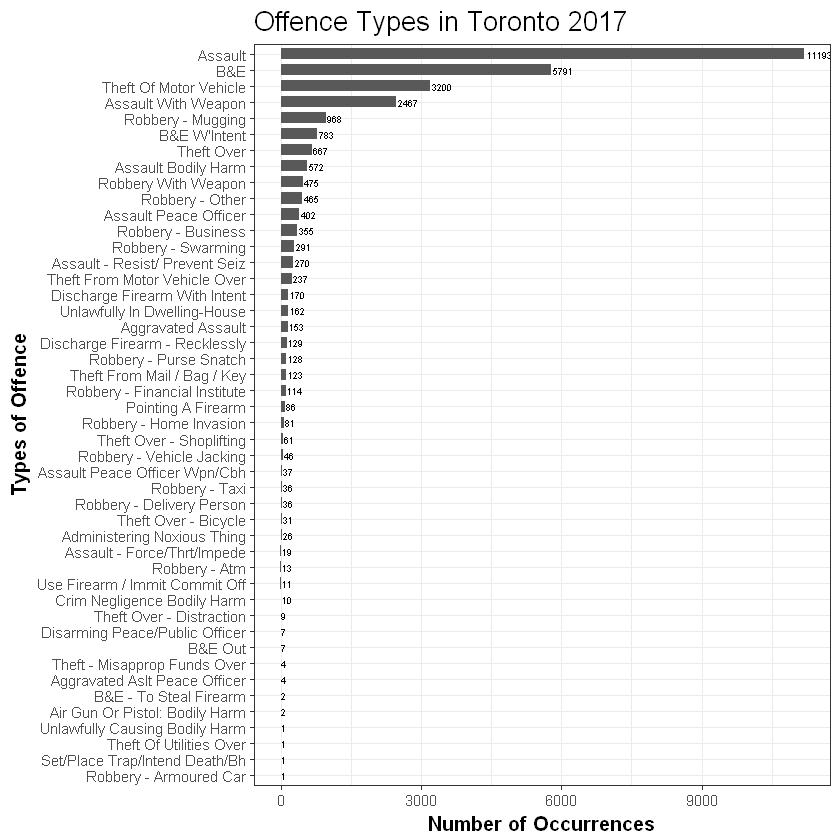

In [40]:
ggplot(aes(x = reorder(offence, n), y = n), data = crime_by_offence_17) +
  geom_bar(stat = 'identity', width = 0.7) +
  geom_text(aes(label = n), stat = 'identity', data = crime_by_offence_17, hjust = -0.1, size = 2) +
  coord_flip() +
  xlab('Types of Offence') +
  ylab('Number of Occurrences') +
  ggtitle('Offence Types in Toronto 2017') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

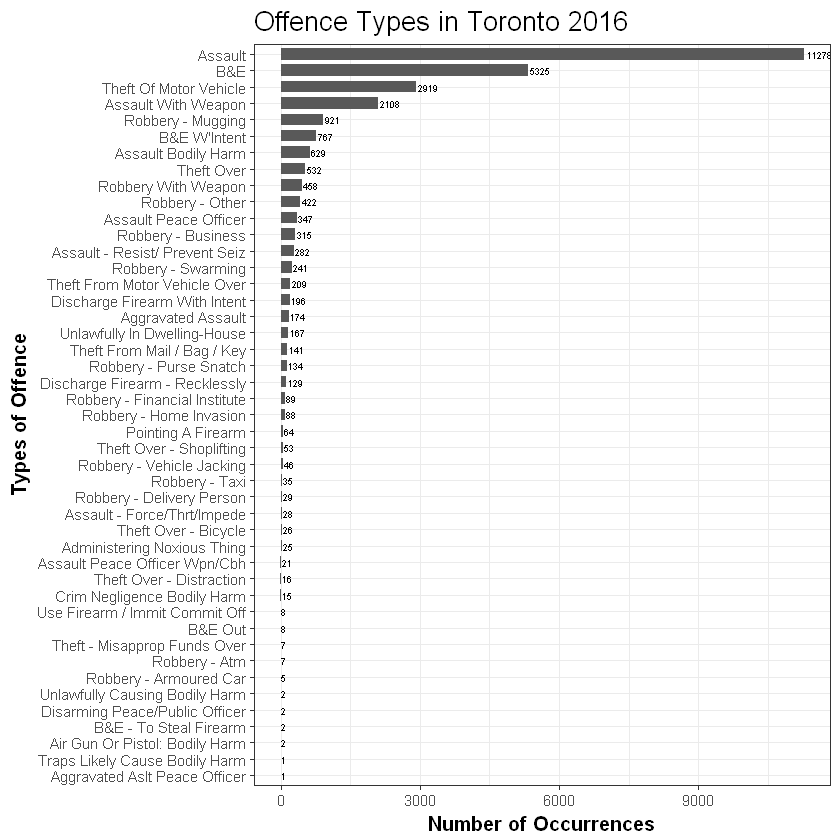

In [41]:
ggplot(aes(x = reorder(offence, n), y = n), data = crime_by_offence_16) +
  geom_bar(stat = 'identity', width = 0.7) +
  geom_text(aes(label = n), stat = 'identity', data = crime_by_offence_16, hjust = -0.1, size = 2) +
  coord_flip() +
  xlab('Types of Offence') +
  ylab('Number of Occurrences') +
  ggtitle('Offence Types in Toronto 2016') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

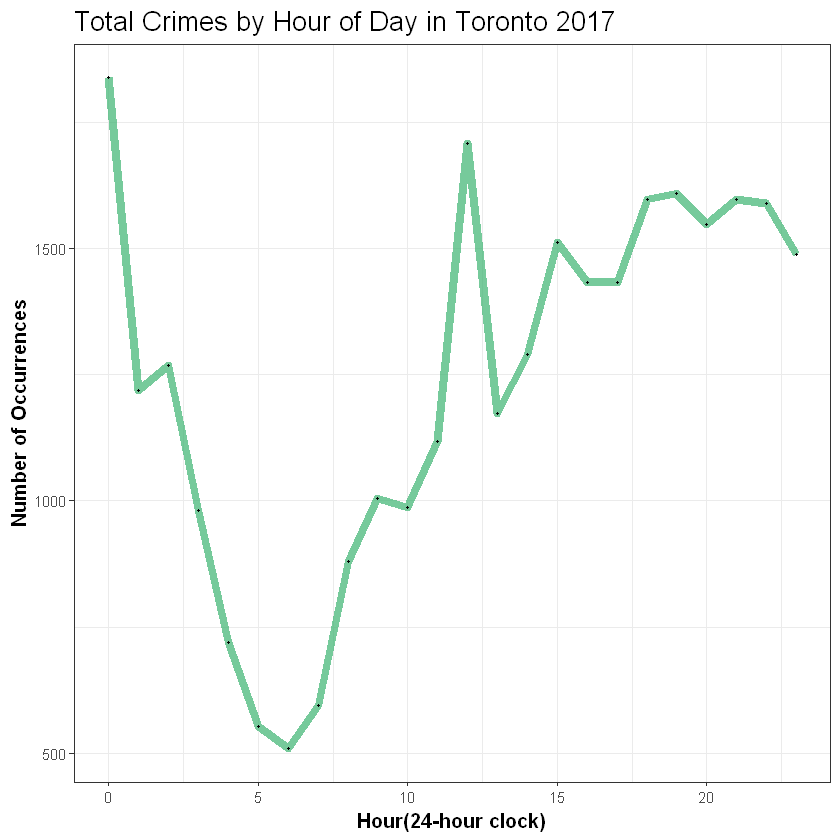

In [42]:
hour_group_17 <- group_by(tor_2017_mod, occurrencehour)
crime_hour_17 <- summarise(hour_group_17, n=n())

ggplot(aes(x=occurrencehour, y=n), data = crime_hour_17) + geom_line(size = 2.5, alpha = 0.7, color = "mediumseagreen", group=1) + 
  geom_point(size = 0.5) + 
  ggtitle('Total Crimes by Hour of Day in Toronto 2017') +
  ylab('Number of Occurrences') +
  xlab('Hour(24-hour clock)') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

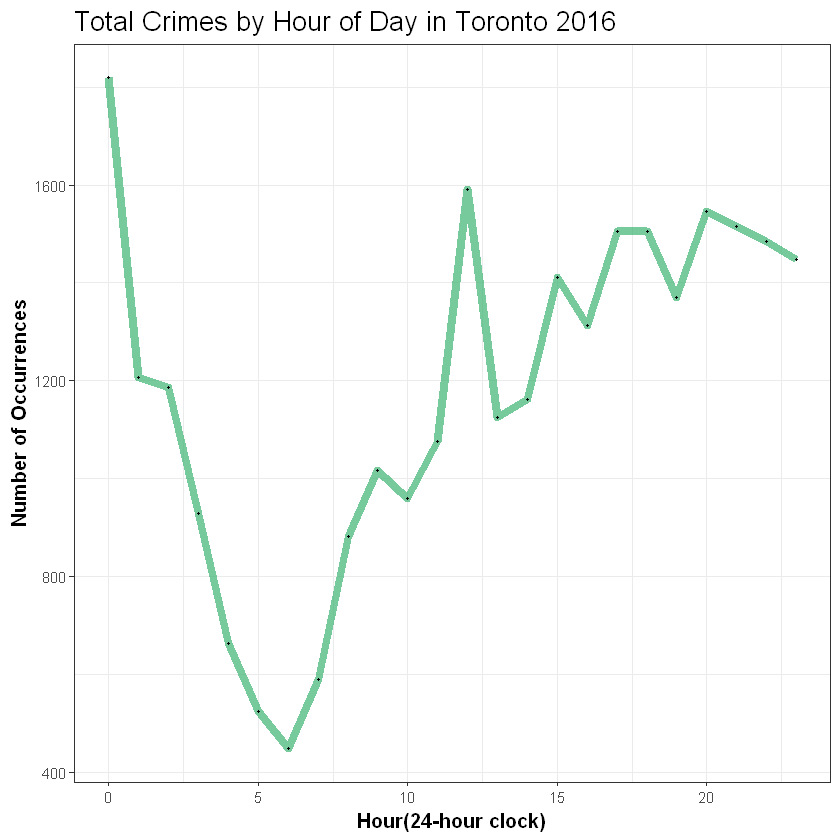

In [43]:
hour_group_16 <- group_by(tor_2016_mod, occurrencehour)
crime_hour_16 <- summarise(hour_group_16, n=n())

ggplot(aes(x=occurrencehour, y=n), data = crime_hour_16) + geom_line(size = 2.5, alpha = 0.7, color = "mediumseagreen", group=1) + 
  geom_point(size = 0.5) + 
  ggtitle('Total Crimes by Hour of Day in Toronto 2016') +
  ylab('Number of Occurrences') +
  xlab('Hour(24-hour clock)') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

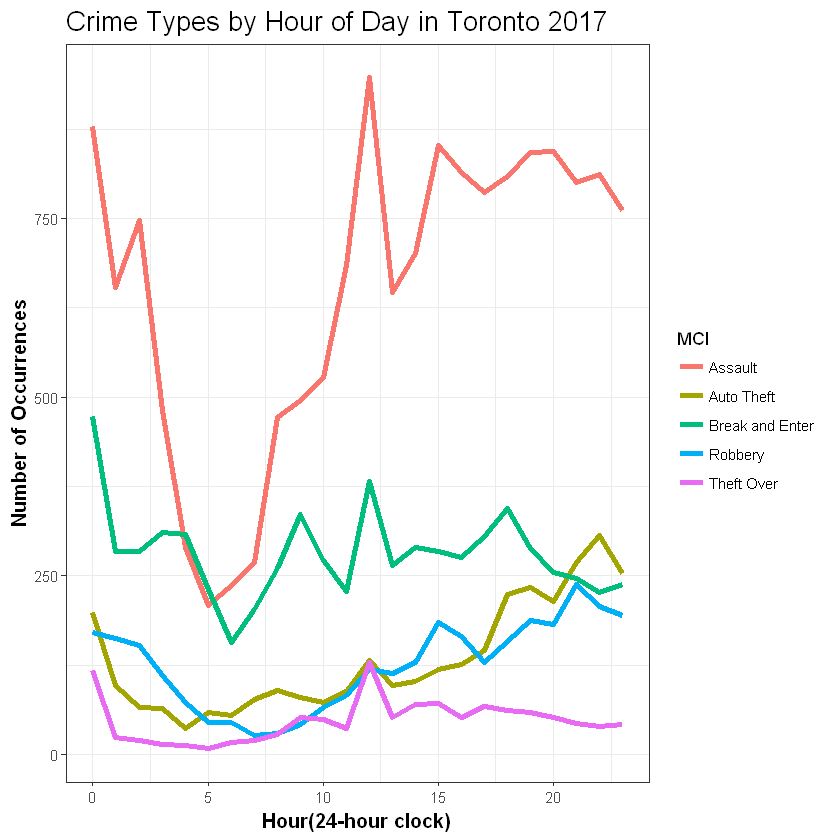

In [44]:
#What types of crime are most frequent at each hour?
hour_crime_group_17 <- group_by(tor_2017_mod, occurrencehour, MCI)
hour_crime_17 <- summarise(hour_crime_group_17, n=n())

ggplot(aes(x=occurrencehour, y=n, color=MCI), data = hour_crime_17) + 
  geom_line(size=1.5) + 
  ggtitle('Crime Types by Hour of Day in Toronto 2017') +
  ylab('Number of Occurrences') +
  xlab('Hour(24-hour clock)') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

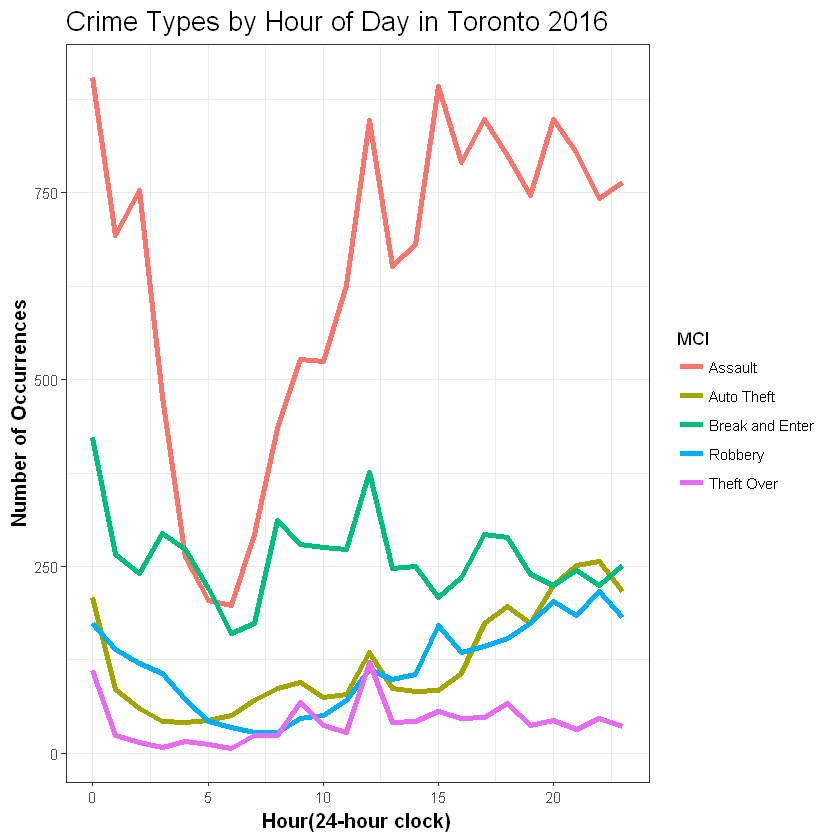

In [73]:
#What types of crime are most frequent at each hour?
hour_crime_group_16 <- group_by(tor_2016_mod, occurrencehour, MCI)
hour_crime_16 <- summarise(hour_crime_group_16, n=n())

ggplot(aes(x=occurrencehour, y=n, color=MCI), data = hour_crime_16) + 
  geom_line(size=1.5) + 
  ggtitle('Crime Types by Hour of Day in Toronto 2016') +
  ylab('Number of Occurrences') +
  xlab('Hour(24-hour clock)') +
  theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"))

In [46]:
location_group_17 <- group_by(tor_2017_mod, Neighbourhood)
crime_by_location_17 <- summarise(location_group_17, n=n())
crime_by_location_17 <- crime_by_location_17[order(crime_by_location_17$n, decreasing = TRUE), ]
crime_by_location_top10_17 <- head(crime_by_location_17, 10)
crime_by_location_top10_17

Neighbourhood,n
Church-Yonge Corridor (75),1204
Waterfront Communities-The Island (77),1053
West Humber-Clairville (1),762
Bay Street Corridor (76),695
Moss Park (73),596
Kensington-Chinatown (78),583
Woburn (137),573
York University Heights (27),553
Downsview-Roding-CFB (26),514
Annex (95),513


In [47]:
location_group_16 <- group_by(tor_2016_mod, Neighbourhood)
crime_by_location_16 <- summarise(location_group_16, n=n())
crime_by_location_16 <- crime_by_location_16[order(crime_by_location_16$n, decreasing = TRUE), ]
crime_by_location_top10_16 <- head(crime_by_location_16, 10)
crime_by_location_top10_16

Neighbourhood,n
Church-Yonge Corridor (75),983
Waterfront Communities-The Island (77),962
West Humber-Clairville (1),735
Moss Park (73),616
Bay Street Corridor (76),579
York University Heights (27),565
Annex (95),493
Woburn (137),483
Kensington-Chinatown (78),473
Downsview-Roding-CFB (26),465


In [74]:
crime_by_location_less10_17 <- tail(crime_by_location_17, 10)
crime_by_location_less10_17

Neighbourhood,n
Princess-Rosethorn (10),66
Maple Leaf (29),63
Centennial Scarborough (133),60
Yonge-Eglinton (100),59
Caledonia-Fairbank (109),54
Broadview North (57),52
Woodbine-Lumsden (60),50
Markland Wood (12),48
Yonge-St.Clair (97),36
Lambton Baby Point (114),28


In [80]:
location_group_17_e <- group_by(tor_2017_mod, Neighbourhood)
crime_by_location_17 <- summarise(location_group_17_e, n=n())
crime_by_location_17 <- crime_by_location_17[order(crime_by_location_17$n, decreasing = FALSE), ]
crime_by_location_less10_17 <- head(crime_by_location_17, 10)
crime_by_location_less10_17

Neighbourhood,n
Lambton Baby Point (114),28
Yonge-St.Clair (97),36
Markland Wood (12),48
Woodbine-Lumsden (60),50
Broadview North (57),52
Caledonia-Fairbank (109),54
Yonge-Eglinton (100),59
Centennial Scarborough (133),60
Maple Leaf (29),63
Princess-Rosethorn (10),66


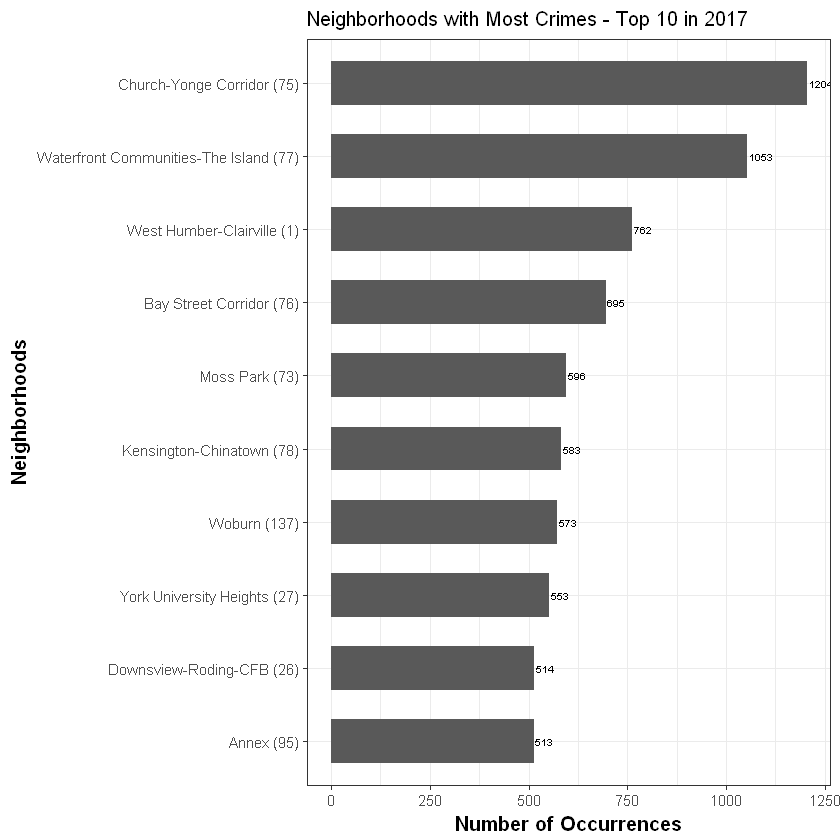

In [49]:
ggplot(aes(x = reorder(Neighbourhood, n), y = n), data = crime_by_location_top10_17) +
  geom_bar(stat = 'identity', width = 0.6) +
  geom_text(aes(label = n), stat = 'identity', data = crime_by_location_top10_17, hjust = -0.1, size = 2.2) +
  coord_flip() +
  xlab('Neighborhoods') +
  ylab('Number of Occurrences') +
  ggtitle('Neighborhoods with Most Crimes - Top 10 in 2017') +
  theme_bw() +
  theme(plot.title = element_text(size = 12),
        axis.title = element_text(size = 12, face = "bold"))

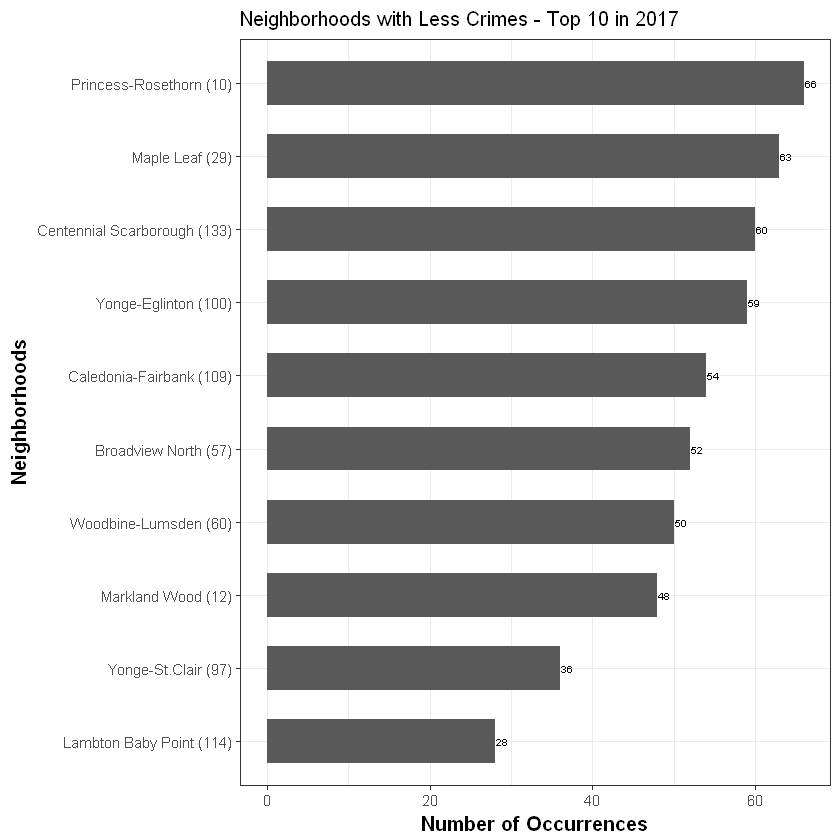

In [81]:

ggplot(aes(x = reorder(Neighbourhood, n), y = n), data = crime_by_location_less10_17) +
  geom_bar(stat = 'identity', width = 0.6) +
  geom_text(aes(label = n), stat = 'identity', data = crime_by_location_less10_17, hjust = -0.1, size = 2.2) +
  coord_flip() +
  xlab('Neighborhoods') +
  ylab('Number of Occurrences') +
  ggtitle('Neighborhoods with Less Crimes - Top 10 in 2017') +
  theme_bw() +
  theme(plot.title = element_text(size = 12),
        axis.title = element_text(size = 12, face = "bold"))

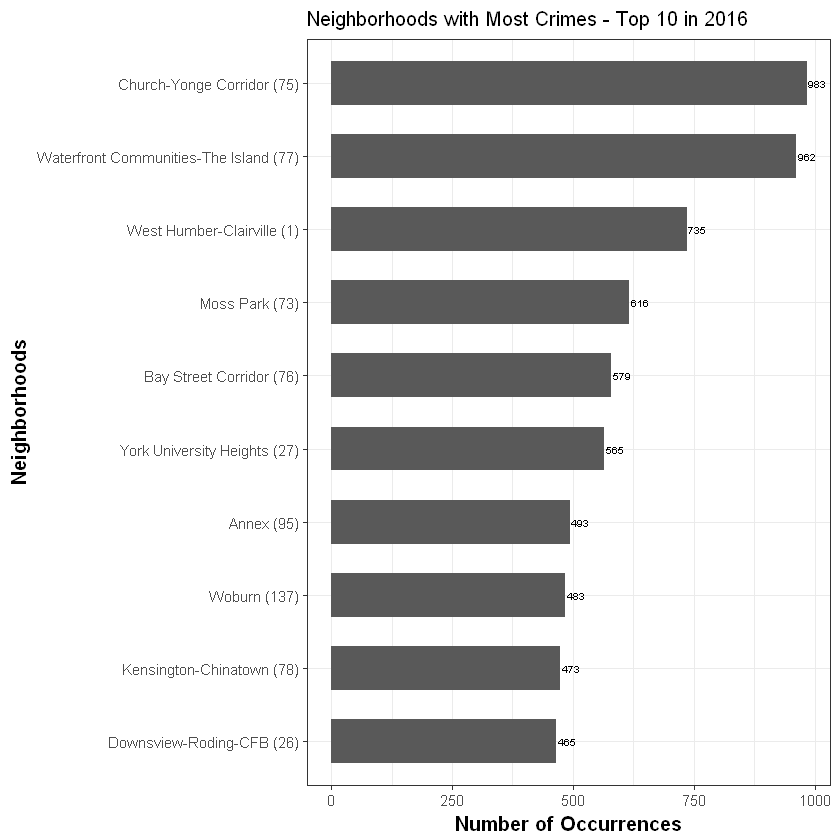

In [50]:
ggplot(aes(x = reorder(Neighbourhood, n), y = n), data = crime_by_location_top10_16) +
  geom_bar(stat = 'identity', width = 0.6) +
  geom_text(aes(label = n), stat = 'identity', data = crime_by_location_top10_16, hjust = -0.1, size = 2.2) +
  coord_flip() +
  xlab('Neighborhoods') +
  ylab('Number of Occurrences') +
  ggtitle('Neighborhoods with Most Crimes - Top 10 in 2016') +
  theme_bw() +
  theme(plot.title = element_text(size = 12),
        axis.title = element_text(size = 12, face = "bold"))

In [51]:
#Safest Places
tail(crime_by_location_17, 5)

Neighbourhood,n
Broadview North (57),52
Woodbine-Lumsden (60),50
Markland Wood (12),48
Yonge-St.Clair (97),36
Lambton Baby Point (114),28


In [70]:
#Danger Places
head(crime_by_location_17, 5)

Neighbourhood,n
Church-Yonge Corridor (75),1204
Waterfront Communities-The Island (77),1053
West Humber-Clairville (1),762
Bay Street Corridor (76),695
Moss Park (73),596


In [52]:
tail(crime_by_location_16, 5)

Neighbourhood,n
Caledonia-Fairbank (109),51
Mount Pleasant East (99),48
Forest Hill South (101),43
Yonge-St.Clair (97),42
Lambton Baby Point (114),24


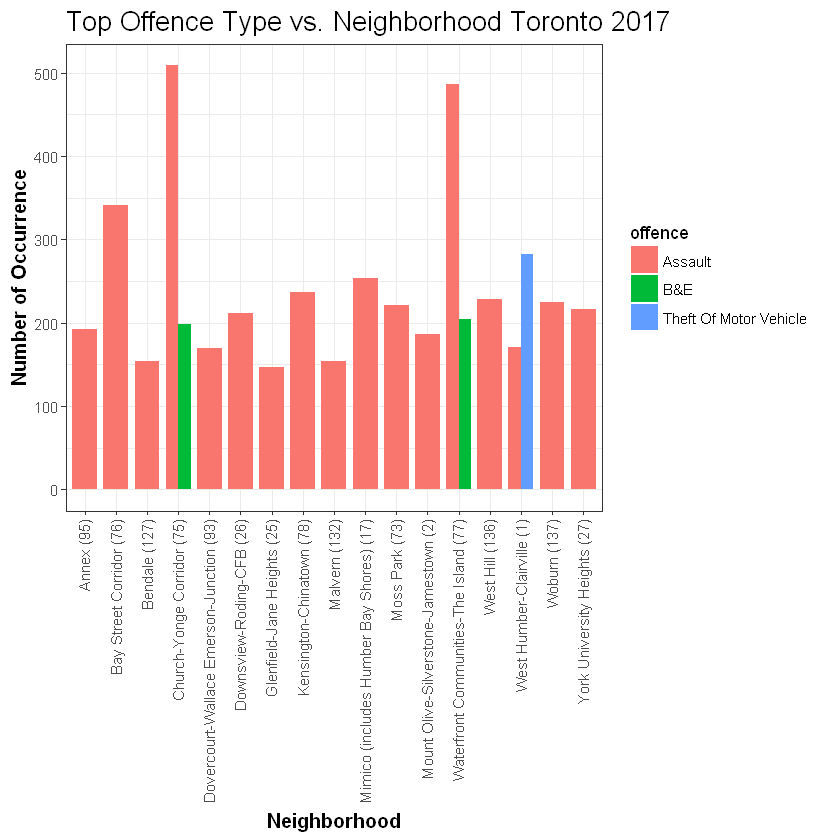

In [53]:
offence_location_group_17 <- group_by(tor_2017_mod, Neighbourhood, offence)
offence_type_by_location_17 <- summarise(offence_location_group_17, n=n())
offence_type_by_location_17 <- offence_type_by_location_17[order(offence_type_by_location_17$n, decreasing = TRUE), ]
offence_type_by_location_top20_17 <- head(offence_type_by_location_17, 20)

ggplot(aes(x = Neighbourhood, y=n, fill = offence), data=offence_type_by_location_top20_17) +
  geom_bar(stat = 'identity', position = position_dodge(), width = 0.8) +
  xlab('Neighborhood') +
  ylab('Number of Occurrence') +
  ggtitle('Top Offence Type vs. Neighborhood Toronto 2017') + theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"),
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = .4))

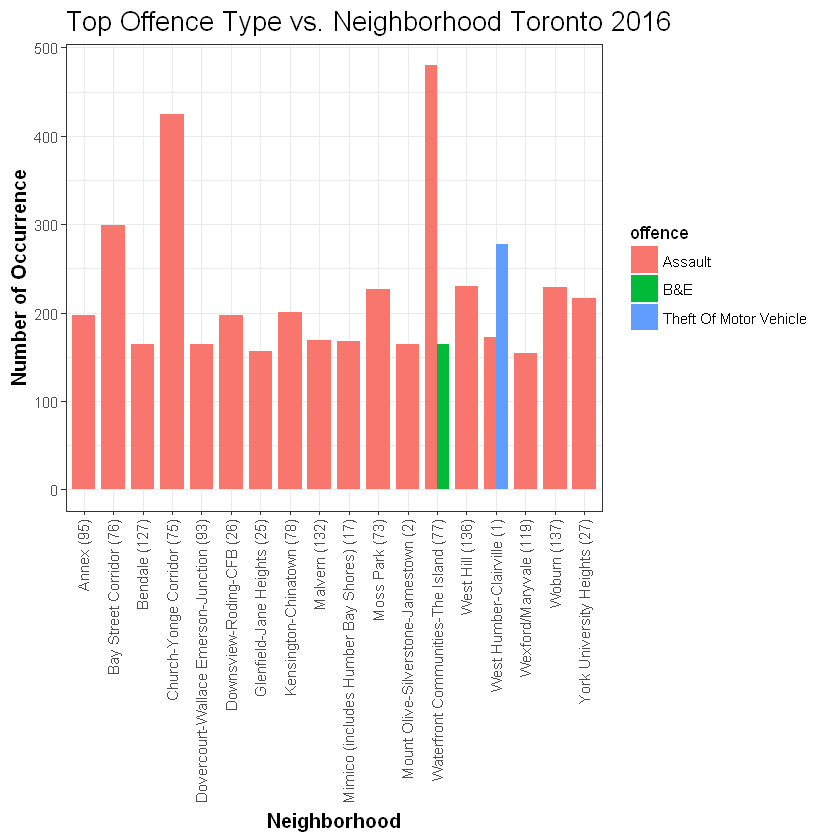

In [54]:
offence_location_group_16 <- group_by(tor_2016_mod, Neighbourhood, offence)
offence_type_by_location_16 <- summarise(offence_location_group_16, n=n())
offence_type_by_location_16 <- offence_type_by_location_16[order(offence_type_by_location_16$n, decreasing = TRUE), ]
offence_type_by_location_top20_16 <- head(offence_type_by_location_16, 20)

ggplot(aes(x = Neighbourhood, y=n, fill = offence), data=offence_type_by_location_top20_16) +
  geom_bar(stat = 'identity', position = position_dodge(), width = 0.8) +
  xlab('Neighborhood') +
  ylab('Number of Occurrence') +
  ggtitle('Top Offence Type vs. Neighborhood Toronto 2016') + theme_bw() +
  theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 12, face = "bold"),
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = .4))

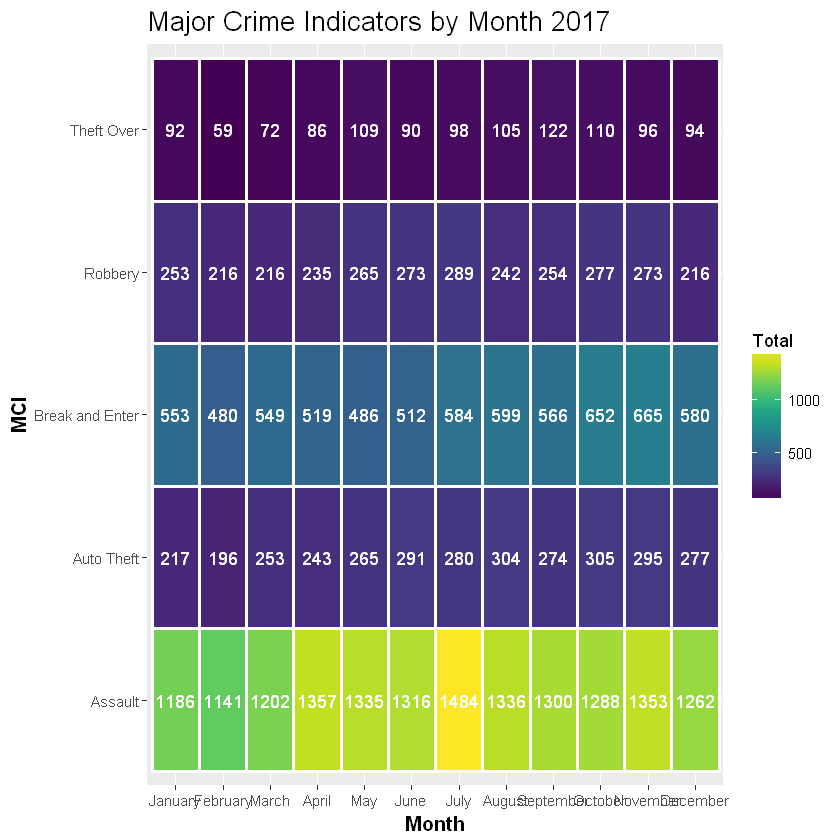

In [57]:
crime_count_17 <- tor_2017_mod %>% group_by(occurrencemonth, MCI) %>% summarise(Total = n())
crime_count_17$occurrencemonth <- ordered(crime_count_17$occurrencemonth, levels = c('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))

ggplot(crime_count_17, aes(occurrencemonth, MCI, fill = Total)) +
  geom_tile(size = 1, color = "white") +
  scale_fill_viridis()  +
  geom_text(aes(label=Total), color='white') +
  ggtitle("Major Crime Indicators by Month 2017") +
  xlab('Month') +
  theme(plot.title = element_text(size = 16), 
        axis.title = element_text(size = 12, face = "bold"))

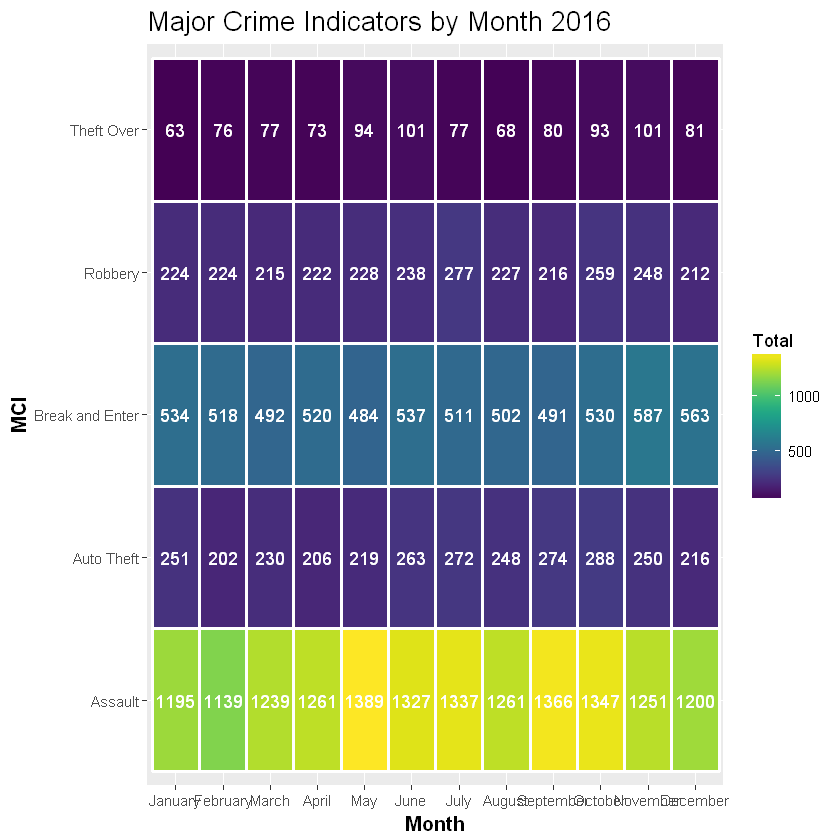

In [58]:
crime_count_16 <- tor_2016_mod %>% group_by(occurrencemonth, MCI) %>% summarise(Total = n())
crime_count_16$occurrencemonth <- ordered(crime_count_16$occurrencemonth, levels = c('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))

ggplot(crime_count_16, aes(occurrencemonth, MCI, fill = Total)) +
  geom_tile(size = 1, color = "white") +
  scale_fill_viridis()  +
  geom_text(aes(label=Total), color='white') +
  ggtitle("Major Crime Indicators by Month 2016") +
  xlab('Month') +
  theme(plot.title = element_text(size = 16), 
        axis.title = element_text(size = 12, face = "bold"))

In [61]:
## K-Means Clustering

by_groups_17 <- group_by(tor_2017_mod, MCI, Neighbourhood)
groups_17 <- summarise(by_groups_17, n=n())
groups_17 <- groups_17[c("Neighbourhood", "MCI", "n")]
groups_wide_17 <- spread(groups_17, key = MCI, value = n)

In [62]:
z <- groups_wide_17[, -c(1,1)]

In [63]:
#The data can not have any missing values.
z <- z[complete.cases(z), ]

In [64]:
#The data must be scaled for comparison
m <- apply(z, 2, mean)
s <- apply(z, 2, sd)
z <- scale(z, m, s)

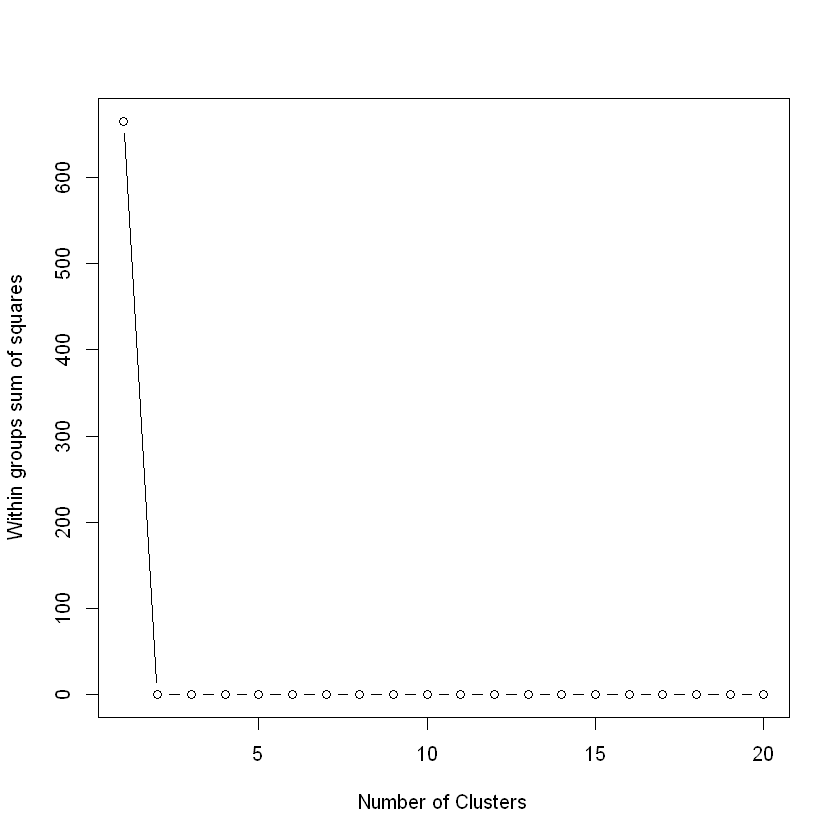

In [65]:
#determine number of clusters 
wss <- (nrow(z)-1) * sum(apply(z, 2, var))
for (i in 2:20) wss[i] <- sum(kmeans(z, centers=i)$withiness)
plot(1:20, wss, type='b', xlab='Number of Clusters', ylab='Within groups sum of squares')

In [66]:
#Fitting a model 
kc <- kmeans(z, 2)
kc

K-means clustering with 2 clusters of sizes 119, 15

Cluster means:
     Assault Auto Theft Break and Enter    Robbery Theft Over
1 -0.2619095 -0.1504037      -0.2245636 -0.2592723 -0.2655921
2  2.0778151  1.1932031       1.7815378  2.0568934  2.1070309

Clustering vector:
  [1] 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1

Within cluster sum of squares by cluster:
[1] 169.0590 198.9117
 (between_SS / total_SS =  44.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

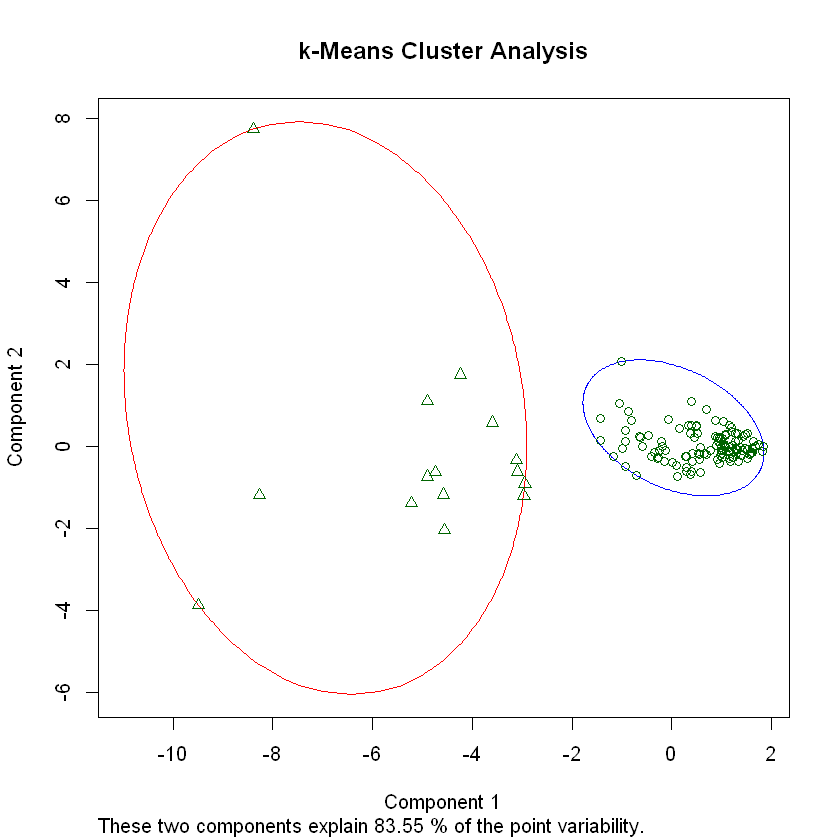

In [67]:
z1 <- data.frame(z, kc$cluster)
clusplot(z1, kc$cluster, color=TRUE, shade=F, labels=0, lines=0, main='k-Means Cluster Analysis')

Warning message:
"bounding box given to google - spatial extent only approximate."converting bounding box to center/zoom specification. (experimental)
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=43.717962,-79.379169&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false


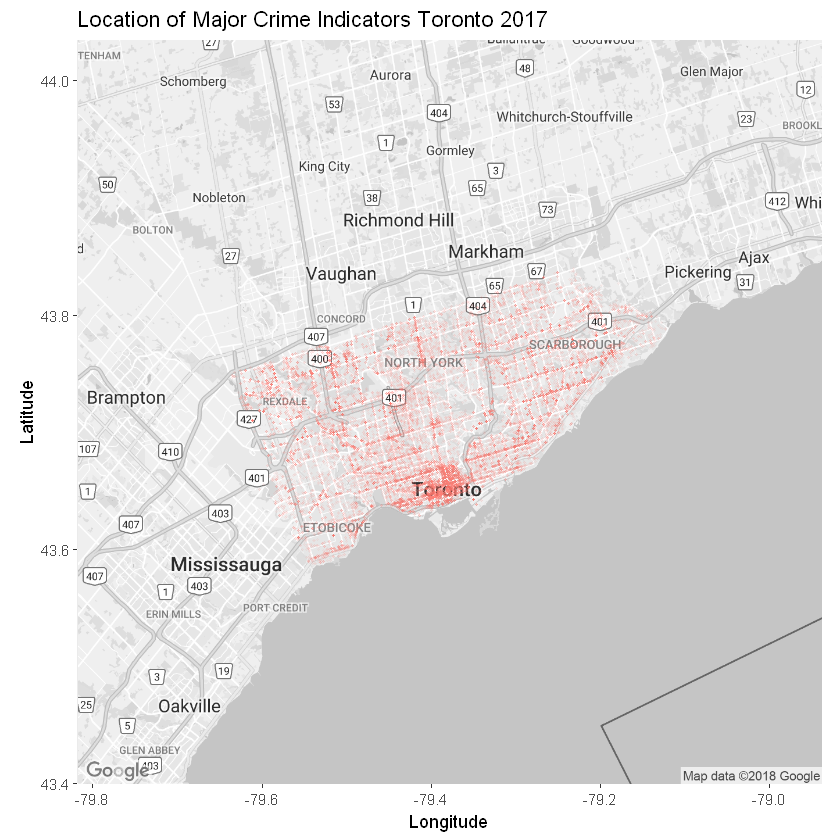

In [68]:
## Mapping.

lat <- tor_2017_mod$Lat
lon <- tor_2017_mod$Long
crimes <- tor_2017_mod$MCI
to_map <- data.frame(crimes, lat, lon)
colnames(to_map) <- c('crimes', 'lat', 'lon')
sbbox <- make_bbox(lon = tor_2017_mod$Long, lat = tor_2017_mod$Lat, f = 0.01)
my_map <- get_map(location = sbbox, maptype = "roadmap", scale = 2, color="bw", zoom = 10)
ggmap(my_map) +
  geom_point(data=to_map, aes(x = lon, y = lat, color = "#27AE60"), 
             size = 0.5, alpha = 0.05) +
  xlab('Longitude') +
  ylab('Latitude') +
  ggtitle('Location of Major Crime Indicators Toronto 2017') +
  guides(color=FALSE)

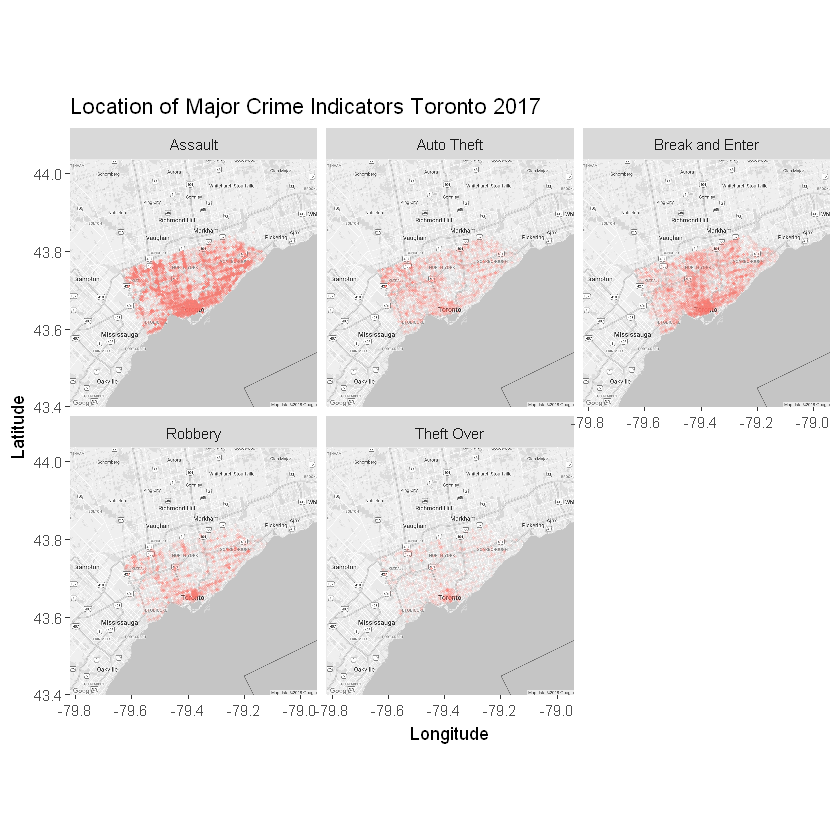

In [69]:
col<-c("red","blue","yellow","purple","green")
ggmap(my_map) +
  geom_point(data=to_map, aes(x = lon, y = lat, color = "col"), 
             size = 0.6, alpha = 0.06) +
  xlab('Longitude') +
  ylab('Latitude') +
  ggtitle('Location of Major Crime Indicators Toronto 2017') +
  guides(color=FALSE) +
  facet_wrap(~ crimes, nrow = 2)

In [71]:
head(tor)

ï..X,event_unique_id,occurrencedate,premisetype,offence,reportedyear,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long
-79.52040,GO-20142775022,2014-08-25T04:00:00.000Z,Outside,Assault,2014,2014,August,25,Monday,18,Assault,Black Creek (24),43.76883,-79.52040
-79.58086,GO-20142870874,2014-08-25T04:00:00.000Z,House,B&E W'Intent,2014,2014,August,25,Monday,9,Break and Enter,Eringate-Centennial-West Deane (11),43.64257,-79.58086
-79.26044,GO-20142802386,2014-08-25T04:00:00.000Z,House,Assault,2014,2014,August,25,Monday,11,Assault,Bendale (127),43.76291,-79.26044
-79.36755,GO-20142777955,2014-08-25T04:00:00.000Z,Commercial,B&E,2014,2014,August,25,Monday,17,Break and Enter,Cabbagetown-South St.James Town (71),43.66321,-79.36755
-79.23176,GO-20142778699,2014-08-25T04:00:00.000Z,Other,B&E,2014,2014,August,25,Monday,16,Break and Enter,Woburn (137),43.77644,-79.23176
-79.23176,GO-20142779394,2014-08-25T04:00:00.000Z,Commercial,B&E,2014,2014,August,25,Monday,16,Break and Enter,Woburn (137),43.77644,-79.23176


In [72]:
ncol(tor)
nrow(tor)

[1] 15

[1] 113908